<a href="https://colab.research.google.com/github/gianpDomiziani/TinyML/blob/main/exploringConvolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploring Convolutions Neural Networks (CNNs)
#How does a convolution work? 
It is know CNNs work very well with images, moreover they allow to reduce the number of parameters for the network, that's another great characteristic. How is it possible? The convolution filter is the key. A convolution layer gives a convolution of the initial image, that has been scan by passing through a filter. In particular, a convolution layer is defined by its own filter that is a matrix containing some weights. Each image's pixel is scanned, in order to get a new value of it taking into account the information of the filter. Each time a pixel is scanned, its own neighbours are considered for the new final value of the select pixel.

In [32]:
import cv2
import numpy as np
from scipy import misc

i = misc.ascent()

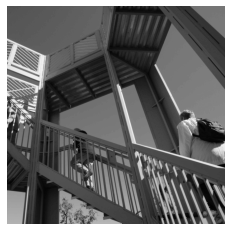

In [33]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

This image allows us to further investigate the role of the convolution filter. It is an image of a stairwell, and it contains enogh features to play around with it. 

In [34]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we create a filter as a 3x3 array

In [35]:
# it allows to catch features related to the edges of the image. We'll use different value of it, in order to detect different features.

#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1] ]
#filter = [ [1, 2, 1], [0, 0, 0], [-1, -2, -1] ]
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# note that we've chose the filter values such that their sum is equal to zero. This is done for getting normalized values. 
# If the filter values do not sum to zero, it could be select a weight such that they do.
weight = 1

In [36]:
for x in range(size_x-1):
  for y in range(size_y-1):
    convolution = 0.0
    convolution += i[x - 1, y - 1] * filter[0][0]
    convolution += i[x, y - 1] * filter[1][0]
    convolution += i[x + 1, y - 1] * filter[2][0]
    convolution += i[x - 1, y] * filter[0][1]
    convolution += i[x, y] * filter[1][1]
    convolution += i[x + 1, y] * filter[2][1]
    convolution += i[x - 1, y + 1] * filter[0][2]
    convolution += i[x, y + 1] * filter[1][2]
    convolution += i[x + 1, y + 1] * filter[2][2]
    convolution *= weight
    if convolution < 0:
      convolution = 0.0
    if convolution > 255.0:
      convolution = 255.0
    i_transformed[x, y] = convolution

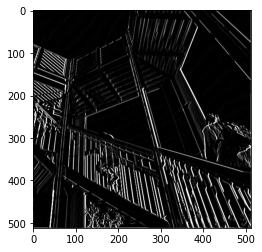

In [37]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
plt.show()

The filter [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]] gives us a very strong set of vertical line. 

## Pooling
Let's see how another principal component of the CNNs works: *The Pool Layer.*
Essentially, pooling an image means kick off all the uselsess information and keeping only the information really helpfull. In particular, the main objective of pooling is to mantain all the detected features, and discard all other information. 

There are several types of Pool Layers, in this story we're focusing on the MAX Pool Layer. The MAX Pool Layer must select only the greater pixel of a given matrix. The dimension of the matrix is defined by the specific of the pool layer. 

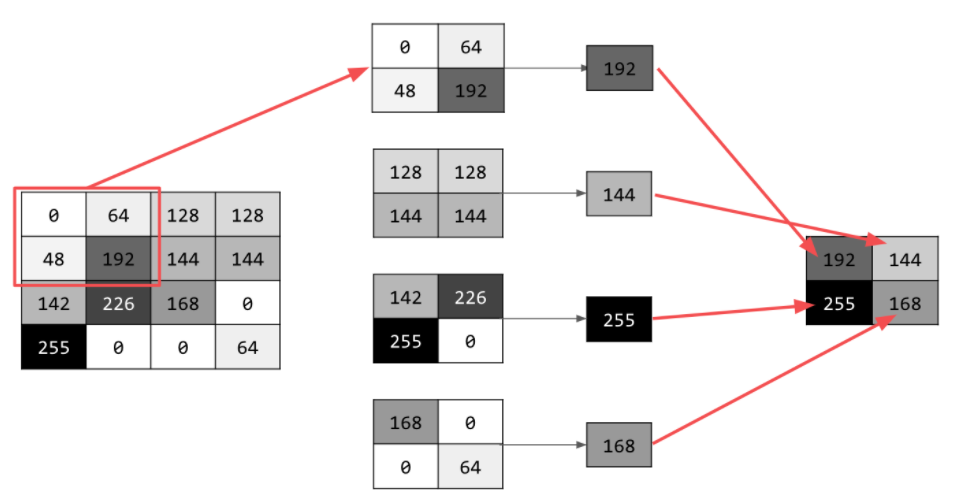


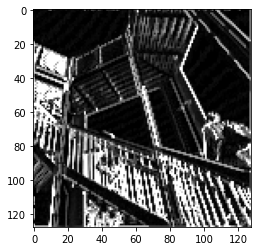

In [31]:
# a 4x4 Pool is used. It will reduce the dimension of the image of 1/4 the initial size, but the extracted features are mantained.
new_x = int(size_x/4)
new_y = int(size_y/4)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 4):
  for y in range(0, size_y, 4):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x+2, y])
    pixels.append(i_transformed[x+3, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    pixels.append(i_transformed[x+2, y+1])
    pixels.append(i_transformed[x+3, y+1])
    pixels.append(i_transformed[x, y+2])
    pixels.append(i_transformed[x+1, y+2])
    pixels.append(i_transformed[x+2, y+2])
    pixels.append(i_transformed[x+3, y+2])
    pixels.append(i_transformed[x, y+3])
    pixels.append(i_transformed[x+1, y+3])
    pixels.append(i_transformed[x+2, y+3])
    pixels.append(i_transformed[x+3, y+3])
    pixels.sort(reverse=True)
    newImage[int(x/4),int(y/4)] = pixels[0]

# Plot the image. Note the size of the axes -- now 128 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()  